In [777]:
N = (11 + 4) % 5 + 1
print("My variant: ", N)

My variant:  1


## Завдання 1

In [779]:
import pandas as pd
names = pd.read_csv("NationalNames.csv")

print(names.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


## Завдання 2

In [781]:
print(names.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


## Завдання 3

In [783]:
df = pd.DataFrame(names)
columns = df.columns
print(columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


## Завдання 5

In [785]:
print(names['Name'].nunique())

93889


## Завдання 10

In [787]:
unique_names_per_year = names.groupby('Year')['Name'].nunique()

print(unique_names_per_year.reset_index())

     Year   Name
0    1880   1889
1    1881   1830
2    1882   2012
3    1883   1962
4    1884   2158
..    ...    ...
130  2010  31603
131  2011  31418
132  2012  31236
133  2013  30774
134  2014  30579

[135 rows x 2 columns]


## Завдання 11

In [789]:
unique_names_per_year = names.groupby('Year')['Name'].nunique()

year_with_max_unique_names = unique_names_per_year.idxmax()
max_unique_names_count = unique_names_per_year.max()

result_df = pd.DataFrame({
    'Year': [year_with_max_unique_names],
    'Count': [max_unique_names_count]
})

print(result_df)

   Year  Count
0  2008  32488


## Завдання 12

In [791]:
unique_names_per_year = names.groupby('Year')['Name'].nunique()
year_with_max_unique_names = unique_names_per_year.idxmax()

most_popular_name = names[names['Year'] == year_with_max_unique_names].sort_values(by='Count', ascending=False).head(1)

print(most_popular_name['Name'].iloc[0])

Jacob


## Завдання 13

In [793]:
filtered_df = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]

if not filtered_df.empty:
    most_popular_row = filtered_df.loc[filtered_df['Count'].idxmax()]
    print(most_popular_row.to_frame().T) 
else:
    print("Не знайдено записів для імені 'Jacob' серед жінок.")

              Id   Name  Year Gender Count
1455556  1455557  Jacob  2004      F   171


## Завдання 14

In [795]:
grouped = df.groupby(['Name', 'Year', 'Gender']).size().unstack(fill_value=0)
neutral_names = grouped[(grouped['M'] > 0) & (grouped['F'] > 0)]
neutral_name_count_by_year = neutral_names.groupby('Year').size()
most_popular_year = neutral_name_count_by_year.idxmax()
most_popular_count = neutral_name_count_by_year.max()
result = pd.DataFrame({
    'Year': [most_popular_year],
    'Gender_neutral_names': [most_popular_count]
})

print(result)

   Year  Gender_neutral_names
0  2008                  2557


## Завдання 15

In [797]:
births_per_year = df.groupby('Year')['Count'].sum().reset_index()
births_per_year.columns = ['year', 'count']

print(births_per_year)

     year    count
0    1880   201484
1    1881   192699
2    1882   221538
3    1883   216950
4    1884   243467
..    ...      ...
130  2010  3686589
131  2011  3646730
132  2012  3643336
133  2013  3626802
134  2014  3670151

[135 rows x 2 columns]


## Завдання 16

In [799]:
births_per_year = df.groupby('Year')['Count'].sum()
most_births_year = births_per_year.idxmax()

print(most_births_year)

1957


## Завдання 17

In [801]:
births_by_gender_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

print(births_by_gender_per_year)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


## Завдання 18

In [803]:
gender_count_per_year = names.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)
years_more_girls = gender_count_per_year[gender_count_per_year['F'] > gender_count_per_year['M']]

print(len(years_more_girls))

54


## Завдання 21

In [805]:
boys_named_barbara = names[(names['Name'] == 'Barbara') & (names['Gender'] == 'M')]

print(boys_named_barbara['Count'].sum())

4139


## Завдання 22

In [807]:
min_year = df['Year'].min()
max_year = df['Year'].max()
years_of_observation = max_year - min_year + 1

print(years_of_observation)

135


## Завдання 23

In [809]:
name_year_count = names.groupby(['Name', 'Year'])['Count'].sum().unstack(fill_value=0)
names_present_in_all_years = name_year_count.dropna(axis=0, how='any')
popular_neutral_names = names_present_in_all_years.sum(axis=1)
most_popular_neutral_names = popular_neutral_names.sort_values(ascending=False)
print(most_popular_neutral_names.reset_index(name = 'Count').head(15))

           Name    Count
0         James  5129096
1          John  5106590
2        Robert  4816785
3       Michael  4330805
4          Mary  4130441
5       William  4071368
6         David  3590557
7        Joseph  2580687
8       Richard  2564867
9       Charles  2376700
10       Thomas  2291517
11  Christopher  2004177
12       Daniel  1876880
13    Elizabeth  1606282
14     Patricia  1575529


## Завдання 24

In [811]:
average_count = df['Count'].mean()
unpopular_names = df[df['Count'] < average_count]
most_popular_unpopular_name = unpopular_names.loc[unpopular_names['Count'].idxmax()]

print(most_popular_unpopular_name[['Name', 'Count']])

Name     Allen
Count      184
Name: 1023, dtype: object


## Завдання 26

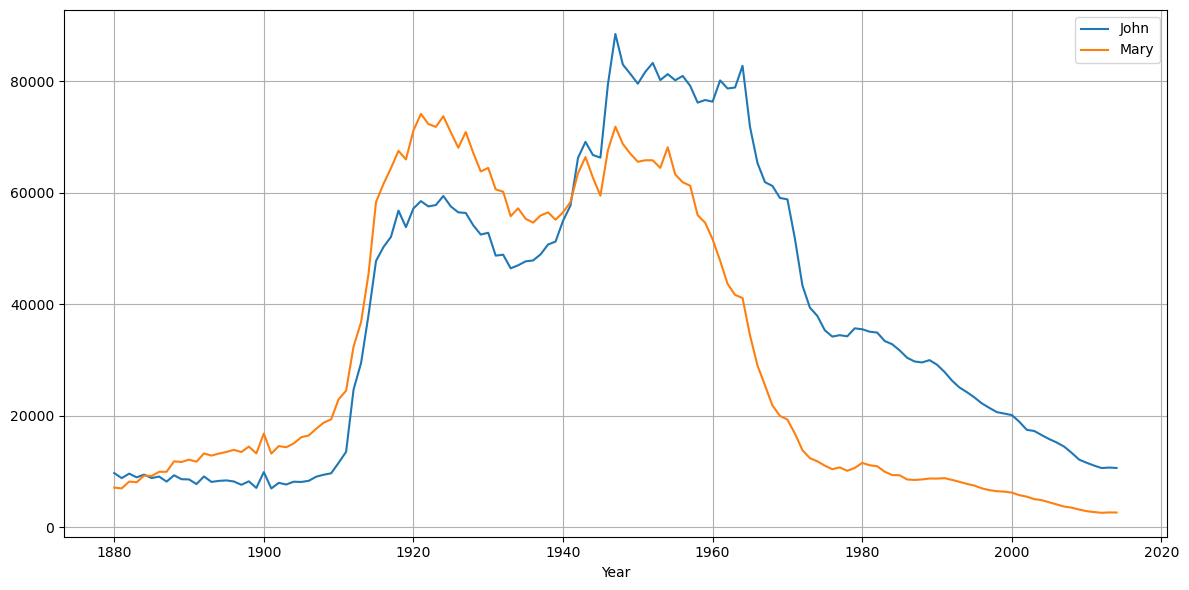

In [835]:
import matplotlib.pyplot as plt

john_data = names[names['Name'] == 'John']
mary_data = names[names['Name'] == 'Mary']
john_years_count = john_data.groupby('Year')['Count'].sum()
mary_years_count = mary_data.groupby('Year')['Count'].sum()
plt.figure(figsize=(12, 6))
plt.plot(john_years_count.index, john_years_count.values, label='John')
plt.plot(mary_years_count.index, mary_years_count.values, label='Mary')


plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()